使用pandas-datareader套件來串接Tiingo的資料，因此需要回到pandas-datareader的說明文件看看語法怎麼寫，如下圖，語法非常簡單：

In [48]:
import os
import pandas_datareader as pdr
from datetime import datetime
import pandas as pd  
import numpy as np
import yfinance as yf
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline  
#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Arial Unicode Ms']
mpl.rcParams['axes.unicode_minus'] = False

AAPL = pdr.get_data_tiingo('AAPL', start=datetime(2017, 2, 9), api_key='678a4c41359d4e9a5589ff0927c82d6900bd4378')
AAPL[:10]


/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_75345/4195567739.py:16: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  AAPL = pdr.get_data_tiingo('AAPL', start=datetime(2017, 2, 9), api_key='678a4c41359d4e9a5589ff0927c82d6900bd4378')


close     high       low    open  \
symbol date                                                            
AAPL   2017-02-09 00:00:00+00:00  132.420  132.445  131.1200  131.65   
       2017-02-10 00:00:00+00:00  132.120  132.940  132.0500  132.46   
       2017-02-13 00:00:00+00:00  133.290  133.820  132.7500  133.08   
       2017-02-14 00:00:00+00:00  135.020  135.090  133.2500  133.47   
       2017-02-15 00:00:00+00:00  135.510  136.270  134.6200  135.52   
       2017-02-16 00:00:00+00:00  135.345  135.900  134.8398  135.67   
       2017-02-17 00:00:00+00:00  135.720  135.830  135.1000  135.10   
       2017-02-21 00:00:00+00:00  136.700  136.750  135.9800  136.23   
       2017-02-22 00:00:00+00:00  137.110  137.120  136.1100  136.43   
       2017-02-23 00:00:00+00:00  136.530  137.480  136.3000  137.38   

                                    volume   adjClose    adjHigh     adjLow  \
symbol date                                                                   
AAPL   2017-02-09 00:00:00+00:00  28349859  30.821994  30.827813  30.519407   
       2017-02-10 00:00:00+00:00  20065458  30.752166  30.943029  30.735873   
       2017-02-13 00:00:00+00:00  23035421  31.024495  31.147857  30.898804   
       2017-02-14 00:00:00+00:00  33226223  31.427168  31.443461  31.015184   
       2017-02-15 00:00:00+00:00  35623100  31.541220  31.718117  31.334064   
       2017-02-16 00:00:00+00:00  22584555  31.502815  31.631996  31.385225   
       2017-02-17 00:00:00+00:00  22198197  31.590100  31.615703  31.445789   
       2017-02-21 00:00:00+00:00  24507156  31.818204  31.829842  31.650617   
       2017-02-22 00:00:00+00:00  20836932  31.913635  31.915963  31.680876   
       2017-02-23 00:00:00+00:00  20788186  31.778635  31.999756  31.725100   

                                    adjOpen  adjVolume  divCash  splitFactor  
symbol date                                                                   
AAPL   2017-02-09 00:00:00+00:00  30.642769  113399436     0.57          1.0  
       2017-02-10 00:00:00+00:00  30.831304   80261832     0.00          1.0  
       2017-02-13 00:00:00+00:00  30.975615   92141684     0.00          1.0  
       2017-02-14 00:00:00+00:00  31.066391  132904892     0.00          1.0  
       2017-02-15 00:00:00+00:00  31.543548  142492400     0.00          1.0  
       2017-02-16 00:00:00+00:00  31.578462   90338220     0.00          1.0  
       2017-02-17 00:00:00+00:00  31.445789   88792788     0.00          1.0  
       2017-02-21 00:00:00+00:00  31.708807   98028624     0.00          1.0  
       2017-02-22 00:00:00+00:00  31.755359   83347728     0.00          1.0  
       2017-02-23 00:00:00+00:00  31.976480   83152744     0.00          1.0

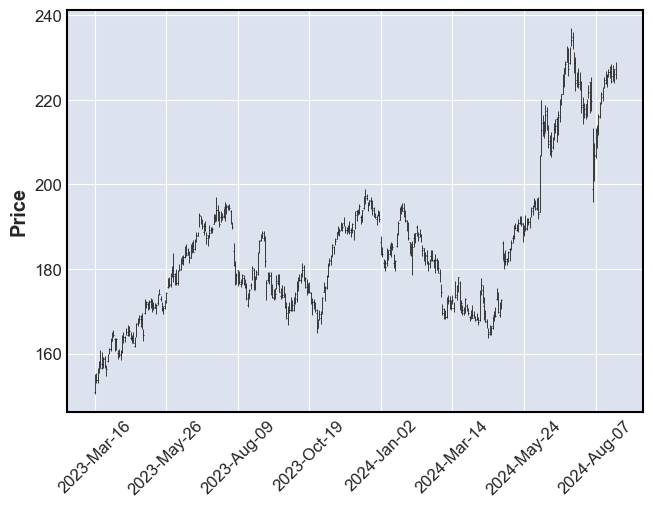

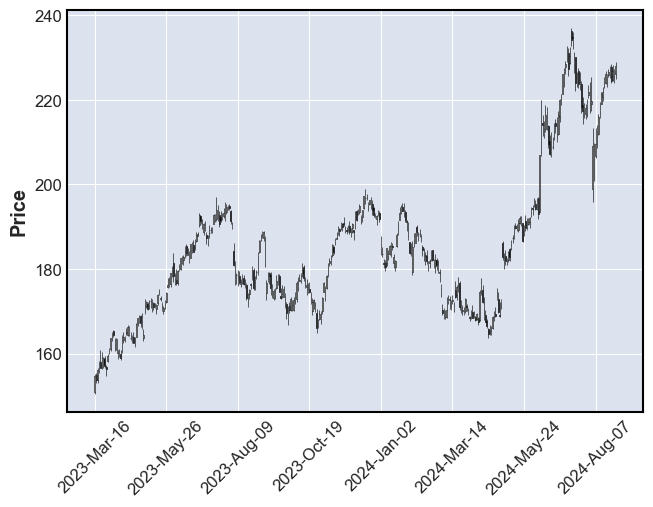

In [49]:
df = AAPL.reset_index(level=[0,1])
# 指定date為index
df.index = df['date']

# 取adjClose至adjOpen的欄位資料
df_adj = df.iloc[:,7:11]

# 更改columns的名稱，以讓mplfinance看得懂
df_adj.columns = ['Close','High','Low','Open']

# 抓取近20日的資料
df_adj_365d = df_adj.iloc[-365:,:]

# 繪製K線圖
import mplfinance as mpf
mpf.plot(df_adj_365d)
mpf.plot(df_adj_365d, type= 'candle')

In [50]:

AAPL = pdr.get_data_tiingo('AAPL', start=datetime(2017, 2, 9), api_key='678a4c41359d4e9a5589ff0927c82d6900bd4378')
AAPL = AAPL.reset_index(level=[0,1])
AAPL.index = AAPL['date']
AAPL_adj = AAPL.iloc[:,7:11]
AAPL_adj.columns = ['Close','High','Low','Open']

# 取2023年的數據
AAPL_adj_2023 = AAPL_adj['2023']

# 開盤價 & 收盤價
AAPL_adj_2023_Open = AAPL_adj_2023.Open
AAPL_adj_2023_Close = AAPL_adj_2023.Close

# 當日漲跌點數
AAPL_DailyChg_2023 = AAPL_adj_2023_Close - AAPL_adj_2023_Open

/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_75345/1378774149.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  AAPL = pdr.get_data_tiingo('AAPL', start=datetime(2017, 2, 9), api_key='678a4c41359d4e9a5589ff0927c82d6900bd4378')
/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_75345/1378774149.py:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  AAPL_adj_2023 = AAPL_adj['2023']


In [51]:
# 取得每日的振幅
AAPL_Abs_DailyChg_2023 = abs(AAPL_DailyChg_2023)

# 分析振幅統計數據，以利篩選適合的K棒
AAPL_Abs_DailyChg_2023.describe()

count    250.000000
mean       1.437223
std        1.117279
min        0.024874
25%        0.549853
50%        1.301592
75%        2.140123
max        6.409910
dtype: float64

In [52]:
# 抓取 第1根大振幅陽線、第2根小振幅陽線或陰線、第3根陰線且振幅大於第1根的1/2
evening_condition_1 = [0,0]
for i in range(2, len(AAPL_DailyChg_2023)):
    if ( AAPL_DailyChg_2023[i-2] > 1.158 ) & ( abs(AAPL_DailyChg_2023[i-1]) < 0.388 ) & ( AAPL_DailyChg_2023[i] < -0.58 ):
        evening_condition_1.append(1)
    else:
        evening_condition_1.append(0)

# condition 1 符合的次數
evening_condition_1.count(1)

# 第2根的開盤與收盤價 均大於 第1根的收盤與第3根的開盤
evening_condition_2 = [0,0]
for i in range(2, len(AAPL_adj_2023_Open)):
    if ( AAPL_adj_2023_Open[i-1] > AAPL_adj_2023_Close[i-2] ) & ( AAPL_adj_2023_Open[i-1] > AAPL_adj_2023_Open[i] ) & ( AAPL_adj_2023_Close[i-1] > AAPL_adj_2023_Close[i-2] ) & ( AAPL_adj_2023_Close[i-1] > AAPL_adj_2023_Open[i] ):
        evening_condition_2.append(1)
    else:
        evening_condition_2.append(0)
evening_condition_2.count(1)

# Evening Star Signal
evening_star_signal = []
for i in range(len(evening_condition_1)):
    if ( evening_condition_1[i] == 1 ) & ( evening_condition_2[i] == 1 ):
        evening_star_signal.append(1)
    else:
        evening_star_signal.append(0)
        
# Find Evening Star date
for i in range(len(evening_star_signal)):
    if evening_star_signal[i] == 1:
        print(AAPL_adj_2023.index[i])

2023-03-07 00:00:00+00:00


/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_75345/3678306523.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  AAPL_adj_2023_Mar = AAPL_adj_2023['2023-03']


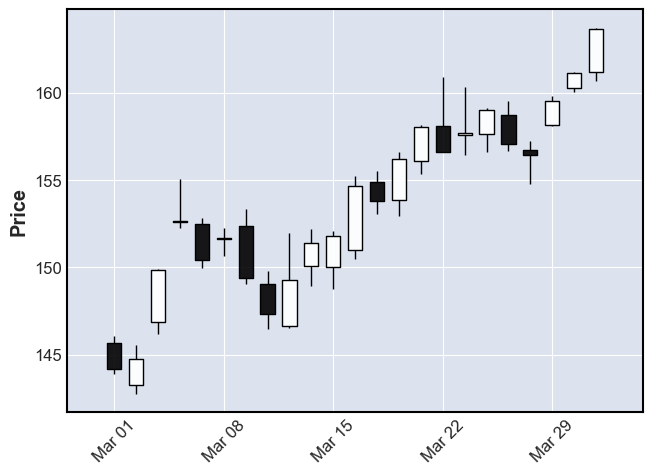

In [53]:
# 檢視K線圖
import mplfinance as mpf

AAPL_adj_2023_Mar = AAPL_adj_2023['2023-03']
mpf.plot(AAPL_adj_2023_Mar,type='candle')

In [55]:
AAPL = AAPL.reset_index(level=[0,1])
AAPL.index = AAPL['date']
AAPL_adj = AAPL.iloc[:,7:11]
AAPL_adj.columns = ['Close','High','Low','Open']

IndexError: Too many levels: Index has only 1 level, not 2

In [ ]:
AAPL_Open_adj = AAPL_adj.Open
AAPL_Open_adj

In [ ]:
ret1 = AAPL_Open_adj.shift(-2) / AAPL_Open_adj.shift(-1)
ret1

In [ ]:
def Evening_Star_Sig(data):
    # 開盤價/收盤價
    data_Open = data.Open
    data_Close = data.Close
    
    # 當日漲跌
    data_DailyChg = data_Close - data_Open
    
    # 取得每日的振幅
    data_Abs_DailyChg = abs(data_DailyChg)
    
    # 計算統計數據
    mean = data_Abs_DailyChg.mean()
    first_quar = data_Abs_DailyChg.quantile(q=0.25)
    
    # 抓取 第1根大振幅陽線、第2根小振幅陽線或陰線、第3根陰線且振幅大於第1根的1/2
    evening_condition_1 = [0,0]
    for i in range(2, len(data_DailyChg)):
        if ( data_DailyChg[i-2] > mean ) & ( abs(data_DailyChg[i-1]) < first_quar ) & ( data_DailyChg[i] < -0.5*mean ):
            evening_condition_1.append(1)
        else:
            evening_condition_1.append(0)
            
    # 第2根的開盤與收盤價 均大於 第1根的收盤與第3根的開盤
    evening_condition_2 = [0,0]
    for i in range(2, len(data_Open)):
        if ( data_Open[i-1] > data_Close[i-2] ) & ( data_Open[i-1] > data_Open[i] ) & ( data_Close[i-1] > data_Close[i-2] ) & ( data_Close[i-1] > data_Open[i] ):
            evening_condition_2.append(1)
        else:
            evening_condition_2.append(0)
            
    # Evening Star Signal
    evening_star_signal = []
    for i in range(len(evening_condition_1)):
        if ( evening_condition_1[i] == 1 ) & ( evening_condition_2[i] == 1 ):
            evening_star_signal.append(1)
        else:
            evening_star_signal.append(0)
            
    # Return a boolean series
    import pandas as pd
    sig = pd.Series(index = data.index, data = evening_star_signal)
    sig = sig.astype('bool')
    return sig

In [ ]:
sig = Evening_Star_Sig(AAPL_adj)
sig.tail(50)

In [ ]:
ret1[sig]


In [ ]:
ret5 = AAPL_Open_adj.shift(-6) / AAPL_Open_adj.shift(-5)
ret5[sig]

In [ ]:
ret1[sig].mean()


In [ ]:
ret5[sig].mean()

In [ ]:
# 回測 Evening star出現後，買賣間隔1~100天的平均報酬率
rets = []
for i in range(2,102):
    ret = AAPL_Open_adj.shift(-i) / AAPL_Open_adj.shift(-1)
    rets.append(ret[sig].mean())
    
# 畫出天數對應報酬率的圖
import pandas as pd
import matplotlib.pyplot as plt
ret_df = pd.DataFrame(index=range(1,101),data=rets)
ret_df.columns = ['return']
ret_df = (ret_df-1) * 100
plt.figure(figsize=(12,8))
plt.plot(ret_df)
plt.hlines(y=0, xmin=0, xmax=100, color='red')
plt.title("平均報酬率 v.s. 買賣間隔時間",fontsize=15)
plt.xlabel("買賣間隔天數(天)", fontsize=15)
plt.ylabel("平均報酬率(%)", fontsize=15)